In [ ]:
## zum Erstellen von Plots

## Plot File

This file is used to create the plots. <br>
For this are following libraries: <b>numpy</b>, <b>matplotlib</b> and <b>ipynb</b> required.
X (HIER ZAHL EINFÜGEN) different plots are created. Each for <b>Awareness, Evolution, Time Development, Awareness Reconstruct</b> and <b>..</b> (Gibt es dafür erklärende Namen???)
Detaild aspects and code-design decisions are being explained in the functions itself.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import import_ipynb
import pickle
from itertools import product
from functools import partial



In [ ]:
from awareness import susceptibility, g2, awareness_SIR 
from analysis import load_data, str_name, awareness_param_names

importing Jupyter notebook from awareness.ipynb
importing Jupyter notebook from analysis.ipynb
importing Jupyter notebook from rk4.ipynb


In [ ]:
def plot_awareness(y: np.ndarray, t: np.ndarray, parameters: dict, fname: str)->None:
    awareness_all = 0
    for i in range(3):
        awareness_average = np.average(y[:, :, i, :], axis=(0, 1))  
        awareness_level = g2(parameters['rho'], awareness_average) 
        awareness_all +=awareness_level #sum over all states (SIR) to get full awareness
    plt.plot(t, awareness_all)
    plt.xlabel("Time")
    plt.ylabel("Awareness")
    plt.savefig(f"figures/{fname}")
    plt.show()


In [ ]:
def plot_evolution(awareness_params: list, name: str, tm: int)->None:
    fig = plt.figure(figsize=(18, 10))
    gs = GridSpec(3, 7, width_ratios=(1, 1, 1, 0.1, 0.1, 1, 1))
    axes = np.array([fig.add_subplot(gs[i, j]) for i in range(3) for j in [0, 1, 2, 5, 6]]).reshape(3, 5)
    ax_cbar = fig.add_subplot(gs[:, 3])
    #axes = fig.subplots(3, 6).reshape(3, 6)
    filename = f'data/{name}_simulation___.' + str_name(awareness_param_names(), awareness_params)
    t, y = load_data(filename)
    SIR = np.sum(y, axis=3)  # sum over awareness axis, new axes: i, j, SIR, time
    S = SIR[:, :, 0]
    I = SIR[:, :, 1]
    R = SIR[:, :, 2]
    for i in range(3):
        aw = np.average(y[:, :, i, :], axis=(0, 1))  # average over grid, susceptible only -> indices: awareness
        awareness_level = g2(awareness_params[3], aw)
        axes[i, 3].plot(t, awareness_level)

        n = np.average(SIR[:, :, i], axis=(0, 1))
        axes[i, 4].plot(t, n, 'orange')

        #dt = t[1:]-t[:-1]
        #dn = n[1:]-n[:-1]
        #t_av = 0.5*(t[1:]+t[:-1])
        #axes[i, 4].plot(t_av, dn/dt, 'darkred')
    axes[2,4].set_xlabel("t")
    axes[0,3].set_title("Awareness")
    #axes[0,4].set_title("Rate (d X / dt)")
    axes[0,4].set_title("Cumulative X (S/I/R)")

    
    kwargs = {
        'interpolation': 'nearest',
        'vmin': 0,
        'vmax': 1
    }
    #m = int(S.shape[-1]*frac)
    m = tm
    axes[0, 0].matshow(S[..., 0], **kwargs)
    axes[0, 1].matshow(S[..., m], **kwargs)
    axes[0, 2].matshow(S[...,-1], **kwargs)
    axes[1, 0].matshow(I[..., 0], **kwargs)
    axes[1, 1].matshow(I[..., m], **kwargs)
    axes[1, 2].matshow(I[...,-1], **kwargs)
    axes[2, 0].matshow(R[..., 0], **kwargs)
    axes[2, 1].matshow(R[..., m], **kwargs)
    im = axes[2, 2].matshow(R[...,-1], **kwargs)
    axes[0,0].set_title(f"t={int(t[0])}")
    axes[0,1].set_title(f"t={int(t[m])}")
    axes[0,2].set_title(f"t={int(t[-1])}")
    axes[2,1].set_xlabel("x")
    axes[0,0].set_ylabel("Susceptible \n")
    axes[1,0].set_ylabel("Infected \n y")
    axes[2,0].set_ylabel("Recovered \n")
    ax_cbar.figure.colorbar(im, ax_cbar)
    fig.suptitle('rows: susceptible, infected, recovered\n\
        columns: grid view at different points in time; awareness, rate of SIR, cumulative SIR')

    #n = np.average(SIR[:, :, 2], axis=(0, 1))
    #print(n[-1])

    fig.tight_layout()
    fig.savefig(f"figures/{name}_evolution.png", transparent=False)
    plt.show()

In [ ]:
"""
def find_param(parameters: np.array, stdparams = [5.0,0.4,0.5,0.7,0.5]):
    #returns the index of the parameter which has been changed and the factor
    for i in range(len(parameters)):
        if parameters[i]!= stdparams[i]:
            factor = parameters[i]/stdparams[i]
            return (i,factor)
        else:

def filename2paramlist(fname):
    #returns a list of used parameters given by the filename
    params = fname[:-4].split("___") #exclude ending and split into different parameters
    paramlist = []
    print(params)
    for p in params:
        try:
            _, value = p.split("_") #split parameter name and value
            paramlist.append(float(value))
        except:
            return []
        
    return paramlist


def get_data_from_files():
    data = []
    for filename in os.listdir("data"):
        with open(os.path.join("data", filename), 'rb') as f:
            t,y = pickle.load(f)
        p = filename2paramlist(filename)
        data.append((t,y,p))
    return data
"""

'\ndef find_param(parameters: np.array, stdparams = [5.0,0.4,0.5,0.7,0.5]):\n    #returns the index of the parameter which has been changed and the factor\n    for i in range(len(parameters)):\n        if parameters[i]!= stdparams[i]:\n            factor = parameters[i]/stdparams[i]\n            return (i,factor)\n        else:\n\ndef filename2paramlist(fname):\n    #returns a list of used parameters given by the filename\n    params = fname[:-4].split("___") #exclude ending and split into different parameters\n    paramlist = []\n    print(params)\n    for p in params:\n        try:\n            _, value = p.split("_") #split parameter name and value\n            paramlist.append(float(value))\n        except:\n            return []\n        \n    return paramlist\n\n\ndef get_data_from_files():\n    data = []\n    for filename in os.listdir("data"):\n        with open(os.path.join("data", filename), \'rb\') as f:\n            t,y = pickle.load(f)\n        p = filename2paramlist(filen

In [ ]:
def plot_reconstruct_awareness():
    fig = plt.figure(figsize=(18,10))
    
    t, awareness_level = load_data('data/awareness.pkl')
    plt.plot(t,awareness_level)
    plt.xlabel("Time")
    plt.ylabel("Awareness")
    plt.savefig("figures/awareness_noinfections.png")
    plt.show()

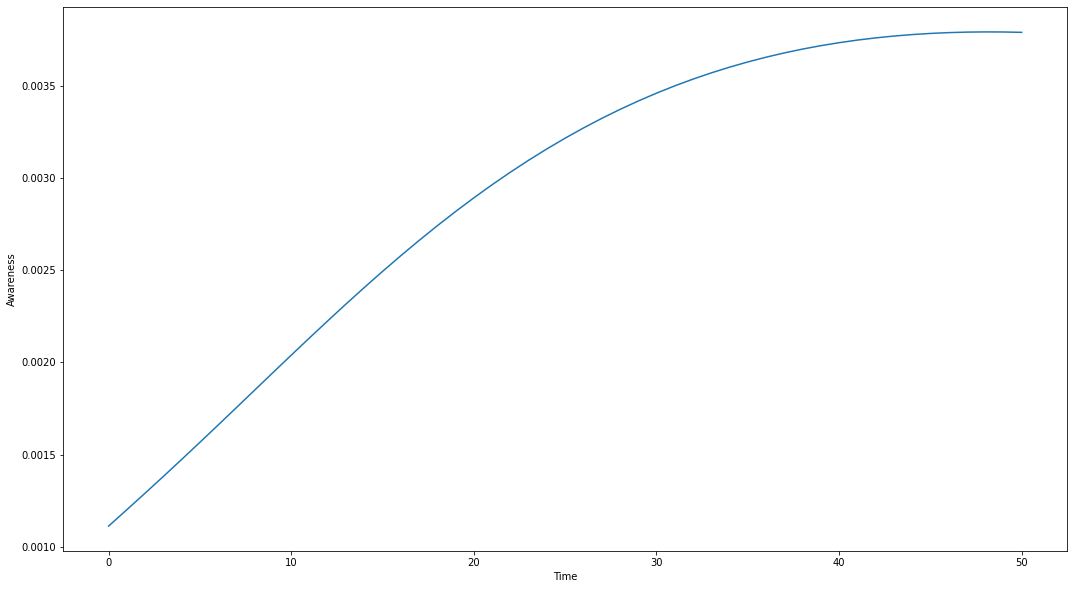

In [ ]:
if __name__ == '__main__':
    plot_reconstruct_awareness()

In [ ]:
def plot_sweep(fname="sweep.png"):
    #plot the highest number of infected against multiple of standard constellation for each parameter

    param_names = ['alpha', 'omega', 'lam', 'rho', 'kappa']
    
    # default
    default_values, default_concurrent_infections = load_data(f'data/variation_default.pkl')

    fig = plt.figure(figsize=(10, 5))
    axes = [fig.add_subplot(1, 2, i+1) for i in range(2)]

    # variations
    for param, default in zip(param_names[0:3], default_values[:3]):
        param_values, concurrent_infections = load_data( f'data/variation_{param}.pkl')
        print(param, param_values, concurrent_infections)
        axes[0].scatter(np.array(param_values)/default, concurrent_infections, label = param)
    axes[0].plot([1], default_concurrent_infections, 'kx', label = 'default')
    axes[0].legend()
    axes[0].set_ylabel("concurrent infections")
    axes[0].set_xlabel("factor to multiply the parameter")

    for param, default in zip(param_names[3:], default_values[3:]):
        param_values, concurrent_infections = load_data( f'data/variation_{param}.pkl')
        print(param, param_values, concurrent_infections)
        s = axes[1].scatter(param_values, concurrent_infections, label = param)
        axes[1].plot(default, default_concurrent_infections, 'x', color=s.get_facecolor())
    axes[1].legend()
    axes[1].set_ylabel("concurrent infections")
    axes[1].set_xlabel("$\\rho, \\kappa$")

    for ax in axes:
        ax.set_ylim(0, 0.3)

    fig.tight_layout()
    fig.savefig(f"figures/{fname}")
    plt.show()

    """
    data = get_data_from_files()
    ilist = []
    faclist = []
    Imax = []
    for dataset in data:
        for t,y,p in dataset:
            i, factor = find_param(p)
            ilist.append(i)
            faclist.append(factor)
            SIR = np.sum(y, axis=3)  # sum over awareness axis, new axes: i, j, SIR, time
            Iav = np.average[SIR[:, :, 1]]
            Imax.append(max(Iav))
    #(isorted, facsorted, Imaxsorted) = sorted(zip(ilist,faclist, Imax))
    s = plt.scatter(faclist, Imax, c = ilist)
    labellist = ["alpha", "omega", "lambda", "rho", "kappa"]
    plt.legend(s.legend_elements()[0], labellist)
    plt.ylabel("maximum number of Infected at the same time")
    plt.xlabel("factor to multiply the parameter")
    plt.savefig(f"figures/{fname}")
    """

[0.02, 0.08] [0.012507705644514684, 0.0090094848699888]
[0.02, 0.08] [0.014046192841187221, 0.00801998718626564]
[0.02, 0.08] [0.01041191043763342, 0.012621123628225319]
rho [0.1, 0.9] [0.01334455569896843, 0.008825194484252273]
kappa [0.0, 0.8] [0.01564639862091291, 0.008927449402644613]


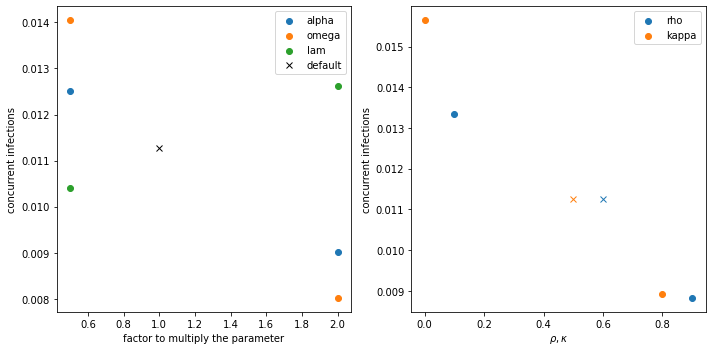

In [ ]:
if __name__ == '__main__':
    plot_sweep()

In [ ]:
def plot_awareness_compartments(awareness_params, simulation_params):
    fig = plt.figure(figsize=(10, 5))
    axes = [fig.add_subplot(1, 2, i+1) for i in range(2)]
    rho = awareness_params[3]
    n =  simulation_params[1]
    sus = np.array(susceptibility(rho, n))
    awareness = 1 - sus
    axes[0].bar(np.array(range(n)), awareness) 
    axes[1].bar(np.array(range(n)), sus)
    for ax in axes:
        ax.set_xticks(range(n))
        ax.set_xlabel('compartment')
    axes[0].set_ylabel('awareness')
    axes[1].set_ylabel('susceptibility')
    fig.tight_layout()
    plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ac0f8ce2-3132-47be-a4d1-6216636e93ff' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>